# 02. 최근접 이웃 알고리즘
> 거리기반 모델인 최근접 이웃 알고리즘을 배워보고 실습을 진행해봅시다.

- toc: true 
- badges: true
- comments: true
- categories: [Day 4]
- permalink: /knn
- exec: colab

<br><br>

### 1. 최근접 이웃 알고리즘이란?

![](https://github.com/gusdnd852/bigdata-lecture/blob/master/_notebooks/img/Day3/knnMain.png?raw=True)

이번에 알려드릴 최근접 이웃(Nearest Neighbors) 알고리즘은 지도학습에 활용되는 가장 단순한 종류의 분류/회귀용 알고리즘입니다. 보통 이 알고리즘을 k-NN이라고도 부르는데, 이는 k-Nearest Neighbors의 약자입니다. k-NN 알고리즘은 새로운 데이터 샘플에 대해 예측할 때 가장 가까운 학습 데이터 샘플, 즉 '최근접 이웃'을 찾아 예측에 사용합니다. 이러한 과정은 선형회귀나 로지스틱 회귀처럼 어떠한 함수를 찾아내는 것이 아니라, 다른 데이터 샘플과의 거리 그 자체를 이용해 분류를 진행합니다.
<br><br>

![](https://github.com/gusdnd852/bigdata-lecture/blob/master/_notebooks/img/Day3/knn1.png?raw=True)

위의 그림을 보면 노란색 원과 초록색 별들이 흩어져 있습니다. '노란색 원', '초록색 별'을 같이 각각 동일한 특성을 가진 두 그룹(e.g. 비만 vs 정상)으로 가정할 때, 그림과 같이 이 두 그룹은 '2차원 평면'에 불규칙적으로 분포되어있습니다. 이는 각 그룹들이 '2가지' 특성(e.g. 몸무게, 키)으로 구분된다고 이야기할 수 있습니다. 만약 3가지 특성(e.g. 몸무게, 키, 체지방량)으로 구분되는 것이라면 3차원 공간에 표현해야겠지요. 
<br><br>

자, 이제 여기에 삼각형으로 표현되는 새로운 데이터 샘플이 하나 등장 했다고 가정합시다. 새로운 샘플은 노란색 원 또는 초록색 별 중 하나가 되야 합니다. 이 경우 새로운 샘플은 노란색 원 그룹에 속할까요, 아니면 초록색 별 그룹에 속할까요?  이를 분류할 수 있는 한 가지 방법은 **데이터 셋에서 가장 가깝게 위치하는 샘플이 속해 있는 그룹으로 분류**하는 것입니다. 위 그림의 경우 새로운 샘플과는 **초록색 별**이 가장 가까이 있으므로, 이 샘플을 **초록색 별 그룹으로 분류하면 됩니다.** 이와 같이 가장 가까이 존재하는 샘플과 같은 그룹으로 분류하는 방법을 'Nearest Neighbor' 라고 합니다.   
<br><br>

![](https://github.com/gusdnd852/bigdata-lecture/blob/master/_notebooks/img/Day3/knn2.png?raw=True)


그런데 이 방법에는 약간 문제가 있어 보입니다. 위 그림을 보면 새로운 샘플 근처에 제일 가깝게 있는 데이터는 초록색 별이지만 **조금만 범위를 넓혀보면 근처에 노란색 원이 훨씬 많은 것을 알 수 있습니다.** 다시 말하면, 새로운 샘플인 삼각형과 가장 가까운 샘플의 분포를 보고 판단하면 초록색 별로 그룹을 분류하겠지만, 조금 더 넓혀 가장 가까운 3개의 샘플을 보고 판단하면 삼각형은 노란색 원으로 분류해야 합니다.
<br><br>

이와 같이 모든 샘플들과의 거리를 계산하고, 그 중 가장 가까운 K개 중에서 더 많이 등장하는 클래스로 분류하는 방법을 k-Nearest Neighbors (K-NN) 알고리즘이라고 부릅니다. 위 예제에서는 $k=1$이면 가장 가까운 1개의 데이터는 초록색이고, $k=3$이면 가장 가까운 3개의 데이터는 (노, 노, 초)로 노란색이 더 많습니다.

<br>

### 2. 최근접 이웃 알고리즘의 파라미터
k-NN 모델을 구현할 때, 파라미터(선택사항)은 탐색할 이웃의 수($k$)와 거리의 측정방식 두 가지입니다. 이들에 대해 이해해봅시다. <br><br>

#### 2.1. 탐색할 이웃의 수(k)

탐색할 이웃의 수($k$)는 위에서 언급한 것 처럼, 가장 가까운 몇개의 샘플을 보고 데이터를 분류할지에 대한 것입니다. 제 경험을 들려드리자면, 5 ~ 30개 정도의 $k$값만 설정해도 어느정도 괜찮은 정확도를 보여주는 것 같습니다. 그러나 이것은 절대적으로 여러분이 가진 데이터에 따라 다르기 때문에 만약 $k-NN$ 알고리즘을 사용하신다면 **여러번 실험을 하여 결정하는 것을 권장**합니다. <br><br>

#### 2.2. 거리 측정 방법
k-NN 알고리즘의 거리측정 방법에는 여러가지 방법이 존재하며 앞서 선형대수학 시간에 배운 거리 측정 방법인 유클리디안($\sum \sqrt{(x_2 - x_1)^2}$), 맨하탄 거리($\sum |x_2 - x_1|$), 민코프스키 거리($\sum \sqrt{p}{(x_2 - x_1)^2}$) 등을 적용 할 수 있습니다.
<br><br>

### 3. 아동 척추 후만증 수술 이후 통증여부 예측하기

후만증 데이터셋은 총 4개의 열이 있고 후만증 통증이 사라졌는지 아직 남아있는지 여부가 라벨로 포함되어있습니다.
아래 주소에서 다운로드 받은 뒤, 압축을 풀고 sample_data 폴더에 넣어주세요! (그냥 드래그 하면 됩니다)
<br>

https://github.com/gusdnd852/bigdata-lecture/files/4955732/kyphosis.zip


```
root경로
    |_...
    |_sample_data
        |_kyphosis.csv
```

<br>

#### 3.1. 데이터셋에 대한 설명
- kyphosis : 척추 통증이 사라졌는지 여부
- age : 아이의 나이 (개월수)
- number: 수술한 척수의 수
- start : 수술 경과일
<br><br>


#### 3.2. 데이터셋 로딩

In [176]:
import pandas as pd

# 0 : 사라짐, 1 : 여전히 존재함
label_dict = {'absent':0, 'present':1} 

dataset = pd.read_csv('sample_data/kyphosis.csv')
dataset = dataset.drop(dataset.columns[0], axis=1)
dataset['kyphosis'] = dataset['kyphosis'].map(label_dict) # 라벨 맵핑 

dataset

,kyphosis,age,number,start
0,0,71,3,5
1,0,158,3,14
2,1,128,4,5
3,0,2,5,1
4,0,1,4,15
...,...,...,...,...
76,1,157,3,13
77,0,26,7,13
78,0,120,2,13
79,1,42,7,6



#### 3.3. 모델링

KNN은 거리기반의 알고리즘입니다. 때문에 공간상에서 시각적으로 어떻게 분포하고 있는지 확인하기 위해서 데이터를 공간상에 표현해보겠습니다.

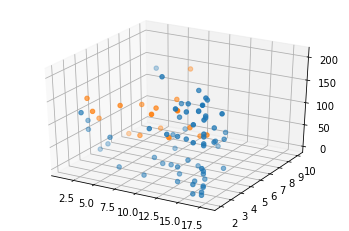

In [177]:
from matplotlib import pyplot as plt


absent = dataset[dataset['kyphosis'] == 0]
present = dataset[dataset['kyphosis'] == 1]

ax = plt.figure().gca(projection='3d')
ax.scatter(absent['start'], absent['number'], absent['age'])
ax.scatter(present['start'], present['number'], present['age'])
plt.show()
plt.close()

데이터의 단위가 너무 상이합니다. 이렇게 되면 거리측정시 큰 문제가 될 수도 있습니다.

In [179]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

data_label = dataset['kyphosis']
data_feature = dataset.drop('kyphosis', axis=1)

split = int(len(data_feature) * 0.8)

train_feature = data_feature[:split]
train_label = data_label[:split]

test_feature = data_feature[split:]
test_label = data_label[split:]

model = KNeighborsClassifier(n_neighbors=3, p=2)
model.fit(train_feature, train_label)
pred = model.predict(test_feature)

accuracy_score(test_label, pred)

0.8235294117647058

In [180]:
report = classification_report(test_label, pred, target_names=['absent', 'present'], zero_division=True)
print(report)

              precision    recall  f1-score   support

      absent       0.88      0.93      0.90        15
     present       0.00      0.00      0.00         2

    accuracy                           0.82        17
   macro avg       0.44      0.47      0.45        17
weighted avg       0.77      0.82      0.80        17



실제로 데이터의 거리가 너무 멀어서 82%의 성능밖에 나오지 않았습니다. 위에서 시각화 할땐 matplotlib이 알아서 이쁘게 그려줘서 저렇게 보였겠지만 실제로 보면 이런 느낌일 겁니다.

![](https://github.com/gusdnd852/bigdata-lecture/blob/master/_notebooks/img/Day3/27.png?raw=True)
<br><br>

세 축을 똑같이 200으로 맞춰보고 보겠습니다.

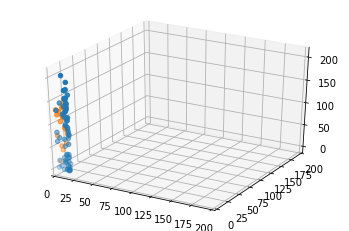

In [181]:
ax = plt.figure().gca(projection='3d')
ax.scatter(absent['start'], absent['number'], absent['age'])
ax.scatter(present['start'], present['number'], present['age'])
plt.xlim(0, 200)
plt.ylim(0, 200)
plt.show()
plt.close()

때문에 축들을 당겨서 각각 축들의 길이가 비슷할 수 있도록 맞춰줘야합니다. 이 과정이 바로 통계시간에 배웠던 표준화 방법입니다.

![](https://github.com/gusdnd852/bigdata-lecture/blob/master/_notebooks/img/Day3/28.png?raw=True)
<br><br>

표준화 결과 아래처럼 두 축이 비슷하여 거리를 제대로 측정할 수 있게 됩니다.

![](https://github.com/gusdnd852/bigdata-lecture/blob/master/_notebooks/img/Day3/29.png?raw=True)
<br><br>


In [182]:
data_label = dataset['kyphosis']
data_feature = dataset.drop('kyphosis', axis=1)
data_feature = (data_feature - data_feature.mean()) / data_feature.std()
# 표준화 적용 !

dataset = data_feature
dataset['kyphosis'] = data_label
dataset 

,age,number,start,kyphosis
0,-0.217786,-0.647998,-1.329623,0
1,1.279522,-0.647998,0.513143,0
2,0.763209,-0.030494,-1.329623,1
3,-1.405307,0.587010,-2.148630,0
4,-1.422518,-0.030494,0.717895,0
...,...,...,...,...
76,1.262312,-0.647998,0.308392,1
77,-0.992257,1.822018,0.308392,0
78,0.625525,-1.265502,0.308392,0
79,-0.716889,1.822018,-1.124871,1


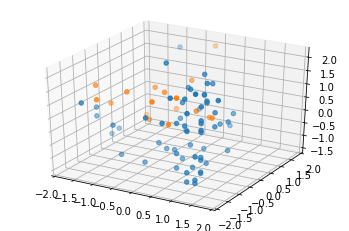

In [183]:
from matplotlib import pyplot as plt


absent = dataset[dataset['kyphosis'] == 0]
present = dataset[dataset['kyphosis'] == 1]

ax = plt.figure().gca(projection='3d')
ax.scatter(absent['start'], absent['number'], absent['age'])
ax.scatter(present['start'], present['number'], present['age'])
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.show()
plt.close()

항목별로 단위가 어느정도는 맞춰졌습니다. 이제 다시 최근접 이웃 알고리즘을 사용해보겠습니다.

In [188]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

data_label = dataset['kyphosis']
data_feature = dataset.drop('kyphosis', axis=1)

split = int(len(data_feature) * 0.8)

train_feature = data_feature[:split]
train_label = data_label[:split]

test_feature = data_feature[split:]
test_label = data_label[split:]

model = KNeighborsClassifier(n_neighbors=3, p=2)
model.fit(train_feature, train_label)
pred = model.predict(test_feature)

accuracy_score(test_label, pred)

0.8823529411764706

In [189]:
report = classification_report(test_label, pred, target_names=['absent', 'present'], zero_division=True)
print(report)

              precision    recall  f1-score   support

      absent       0.88      1.00      0.94        15
     present       1.00      0.00      0.00         2

    accuracy                           0.88        17
   macro avg       0.94      0.50      0.47        17
weighted avg       0.90      0.88      0.83        17



분류 성능으로 88%의 정확도가 나왔습니다. 표준화로 인해 거리 측정이 안정되어 성능이 향상되었습니다. 그러나 k(n_neighbors)값과 p(L1거리 vs L2거리)값을 고정한 상태로 측정한 결과이기 때문에 확인할 이웃의 수와 거리 방식을 변경해보겠습니다.
<br><br>

여기에는 GridSearchCV를 사용합니다. sklearn의 GridSearchCV는 모델에 사용할 최적의 파라미터를 자동으로 찾아줍니다. GridSearchCV를 구현하기위해 사용되는 그리드서치 알고리즘은 매우 간단한데, 모든 가능한 경우의 수를 다 실행해보고 가장 좋은 성능을 보여주는 파라미터를 알려줍니다.
<br><br>

예를 들어 param_grid를 다음과 같이 설정했다고 합시다.

```python
'n_neighbors':[1, 2, 3, 4, 5]
'p':[1, 2, 3]    
```

그러면 모든 실행가능한 경우의 수를 모두 확인해보고 가장 높은 결과값이 어떤 파라미터에서 나왔는지 알려주는 방식입니다. 

```
n_neighbors : 1, p: 1 = 82%
n_neighbors : 1, p: 2 = 82%
n_neighbors : 1, p: 3 = 82%
n_neighbors : 2, p: 1 = 82%
n_neighbors : 2, p: 2 = 86%
n_neighbors : 2, p: 3 = 86%
...
n_neighbors : 5, p: 1 = 88%
n_neighbors : 5, p: 2 = 94%
n_neighbors : 5, p: 3 = 88%

return {n_neighbors : 5, p: 2}
```

GridSearchCV는 매우 유용하게 사용할 수 있으니 아래 예시를 보시고 잘 익혀두시길 바랍니다.

In [191]:
from sklearn.model_selection import GridSearchCV

model = KNeighborsClassifier()
grid_search = GridSearchCV(
    estimator=model,
    param_grid = {
        # 1부터 30씩 홀수만 (1, 3, 5, ..., 29)
        'n_neighbors': [_ for _ in range(1, 30, 2)],
        
        # 맨하탄 vs 유클리디언
        'p':[1, 2] 
    },
    return_train_score=True
)


grid_search.fit(train_feature, train_label)
grid_search.best_params_

{'n_neighbors': 11, 'p': 2}

In [192]:
model = KNeighborsClassifier(n_neighbors=11, p=2)
model.fit(train_feature, train_label)
pred = model.predict(test_feature)

accuracy_score(test_label, pred)

0.9411764705882353

In [193]:
report = classification_report(test_label, pred, target_names=['absent', 'present'], zero_division=True)
print(report)

              precision    recall  f1-score   support

      absent       0.94      1.00      0.97        15
     present       1.00      0.50      0.67         2

    accuracy                           0.94        17
   macro avg       0.97      0.75      0.82        17
weighted avg       0.94      0.94      0.93        17



정확도가 상승하여 94%가 되었습니다. 이제 어느정도 잘 예측하게 되는 모델이 되었다고 할 수 있습니다. 마지막으로 모델을 저장하겠습니다.

In [210]:
# sklearn 모델 저장
import joblib
import os

if not os.path.exists('./models/'):
    os.makedirs('./models/')

joblib.dump(model, './models/knn.pkl')

['./models/knn.pkl']

In [211]:
# sklearn 모델 불러오기
import os

if not os.path.exists('./models/'):
    os.makedirs('./models/')

model = joblib.load('./models/knn.pkl')

In [212]:
for i, data in enumerate(zip(train_feature.T.items(), train_label)):
    print(data, end='\n\n')
    
    if i > 1:
        break

((0, age      -0.217786
number   -0.647998
start    -1.329623
Name: 0, dtype: float64), 0)

((1, age       1.279522
number   -0.647998
start     0.513143
Name: 1, dtype: float64), 0)

((2, age       0.763209
number   -0.030494
start    -1.329623
Name: 2, dtype: float64), 1)



In [213]:
# sklearn 모델 예측하기 
# (위의 실제 정답셋과 비교해보세요)

import numpy as np

eval_data = np.array([ 0.763209,
                      -0.030494,
                     -1.329623])

eval_data = eval_data.reshape(1, -1)
pred = model.predict(eval_data) 
list(label_dict.keys())[list(label_dict.values()).index(pred)]
# 실제 정담 : 1(여전히 남아있음) | 예측 : 1(여전히 남아있음)

'present'

### 4. k-NN의 장점

k-NN 알고리즘의 핵심은 이 것입니다. 로지스틱회귀와 같이 분류를 위한 '선'을 찾아내는 다른 머신러닝 모델들은 특수하게 튀는 데이터들에 의해 큰 영향을 받습니다. 아래의 예제를 봅시다.

In [4]:
#collpase-hide

#collapse-hide
from matplotlib import pyplot as plt


def draw_weight_graph(data, boundary, title):
    """
    정상과 비만 데이터를 그래프로 표시하는 함수입니다.

    :param data: 표시할 데이터프레임
    :param boundary: 데이터 클래스를 구분하는 선
    """

    normal_people = data[data['비만(정답)']=='정상']
    fat_people = data[data['비만(정답)'] == '비만']
    qeury_person = data[data['비만(정답)'] == '???']

    plt.scatter(normal_people['신장'], normal_people['몸무게'], label='normal') 
    # 정상 데이터
    plt.scatter(fat_people['신장'], fat_people['몸무게'], label='fat') 
    # 비만 데이터
    plt.scatter(qeury_person['신장'], qeury_person['몸무게'], label='question') 
    # 쿼리 데이터 (맞출 문제)
    plt.plot(*boundary) 
    # 데이터 클래스를 구분할 수 있는 선

    plt.title(title)
    plt.xlabel('height')
    plt.ylabel('weight')
    plt.legend(loc='upper left')
    plt.grid(True)    
    plt.xlim(160, 200)
    plt.show()
    plt.close()

In [2]:
#collapse-hide
import pandas as pd

weight_df = pd.DataFrame(
    columns=['이름', '신장' , '몸무게', '비만(정답)'],

    data=[['도람푸', 177, 76, '정상'],
          ['핵정은', 165, 85, '비만'],
          ['김병만', 165, 61, '정상'],     
          ['김준현', 180, 105, '비만'],    
          ['오지헌', 178, 72, '정상'],    
          ['유재석', 176, 71, '정상'],
          ['강호동', 178, 98, '비만'],  
          ['저팔계', 177, 89, '???'],  
          ['문세윤', 176, 92, '비만'],    
          ['김철수', 174, 70, '정상'],    
          ['안상수', 180, 69, '정상'],    
          ['스윙스', 170, 90, '비만'],    
          ['한요한', 174, 70, '정상'],    
          ['슈퍼비', 166, 63, '정상'],
          ['유민상', 180, 110, '비만']]
)

weight_df.head(20)

,이름,신장,몸무게,비만(정답)
0,도람푸,177,76,정상
1,핵정은,165,85,비만
2,김병만,165,61,정상
3,김준현,180,105,비만
4,오지헌,178,72,정상
5,유재석,176,71,정상
6,강호동,178,98,비만
7,저팔계,177,89,???
8,문세윤,176,92,비만
9,김철수,174,70,정상


이전에 봤었던 비만-정상 데이터셋입니다. 이 데이터는 아래와 같이 그려집니다.

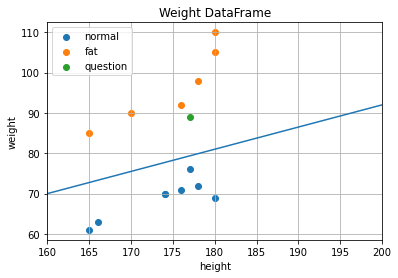

In [5]:
#collapse-hide
draw_weight_graph(weight_df, ([160, 200], [70, 92]), "Weight DataFrame")

로지스틱 회귀모형과 같은 일반적인 분류 모델들은 위와 같이 데이터를 나누는 일종의 선을 찾습니다. 이러한 선은 직선이 될 수도, 곡선이 될 수도 있습니다. 우리는 비만인지 아닌지 모르는 데이터인 '저팔계'의 비만 여부를 맞추고자 합니다. 다른 데이터들을 보고 저팔계를 성공적으로 분류해냈습니다.
<br><br>

그러나 이러한 선을 찾을 때 데이터에 크게 영향을 받게 됩니다. 따라서 만약 이상치(이상한 데이터)인 '최홍만'이 입력되면 그래프는 아래처럼 변하게 됩니다.

In [132]:
#collapse-hide
import pandas as pd

new_weight_df = pd.DataFrame(
    columns=['이름', '신장' , '몸무게', '비만(정답)'],

    data=[['도람푸', 177, 76, '정상'],
          ['핵정은', 165, 85, '비만'],
          ['김병만', 165, 61, '정상'],     
          ['김준현', 180, 105, '비만'],    
          ['오지헌', 178, 72, '정상'],    
          ['유재석', 176, 71, '정상'],
          ['강호동', 178, 98, '비만'],  
          ['저팔계', 177, 89, '???'],  
          ['문세윤', 176, 92, '비만'],    
          ['김철수', 174, 70, '정상'],    
          ['안상수', 180, 69, '정상'],    
          ['스윙스', 170, 90, '비만'],    
          ['한요한', 174, 70, '정상'],    
          ['슈퍼비', 166, 63, '정상'],
          ['유민상', 180, 110, '비만'],
          ['최홍만', 195, 107, '정상']]
)

new_weight_df.head(20)

,이름,신장,몸무게,비만(정답)
0,도람푸,177,76,정상
1,핵정은,165,85,비만
2,김병만,165,61,정상
3,김준현,180,105,비만
4,오지헌,178,72,정상
5,유재석,176,71,정상
6,강호동,178,98,비만
7,저팔계,177,89,???
8,문세윤,176,92,비만
9,김철수,174,70,정상


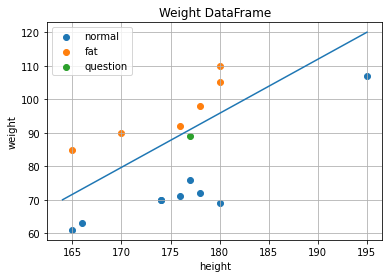

In [133]:
#collapse-hide
draw_weight_graph(new_weight_df, ([164, 195], [70, 120]), "Weight DataFrame")

최홍만과 같은 이상치 데이터를 우리는 'Outlier(아웃 라이어)'라고 부릅니다. 일반적인 분류 모델들은 이러한 아웃라이어에 의해 그룹을 나누는 선이 크게 영향을 받게 됩니다. 위 예제에서도 이에 따라 기존에 잘 예측하였던 샘플인 '저팔계'가 잘못 예측되어 정확도가 감소하였습니다.

In [134]:
#collapse-hide
from matplotlib import pyplot as plt


def draw_weight_graph_with_center(data, center, radius, title):
    """
    정상과 비만 데이터를 그래프로 표시하는 함수입니다.

    :param data: 표시할 데이터프레임
    :param boundary: 데이터 클래스를 구분하는 선
    """

    normal_people = data[data['비만(정답)']=='정상']
    fat_people = data[data['비만(정답)'] == '비만']
    qeury_person = data[data['비만(정답)'] == '???']

    plt.scatter(normal_people['신장'], normal_people['몸무게'], label='normal') 
    # 정상 데이터
    plt.scatter(fat_people['신장'], fat_people['몸무게'], label='fat') 
    # 비만 데이터
    plt.scatter(qeury_person['신장'], qeury_person['몸무게'], label='question') 
    # 쿼리 데이터 (맞출 문제)
    plt.scatter(*center, s=radius, facecolors='none', edgecolors='g')

    plt.title(title)
    plt.xlabel('height')
    plt.ylabel('weight')
    plt.legend(loc='upper left')
    plt.grid(True)    
    plt.show()
    plt.close()

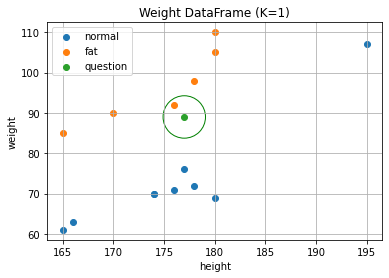

In [140]:
#collapse-hide
draw_weight_graph_with_center(new_weight_df, (177,89), 1800, "Weight DataFrame (K=1)")


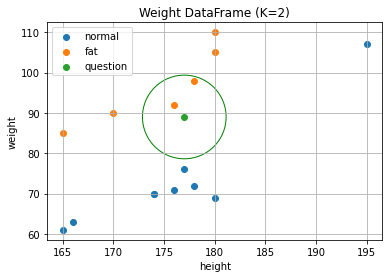

In [142]:
#collapse-hide
draw_weight_graph_with_center(new_weight_df, (177,89), 7000, "Weight DataFrame (K=2)")


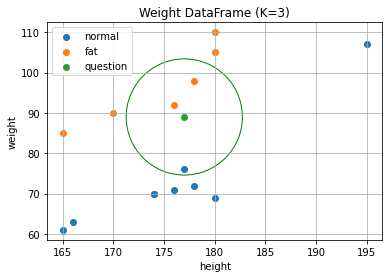

In [143]:
#collapse-hide
draw_weight_graph_with_center(new_weight_df, (177,89), 13500, "Weight DataFrame (K=3)")


그러나 K-NN은 단지 가장 가까운 K개의 데이터만 보기 때문에 K=1, 2, 3인 경우에 모두 정확하게 비만으로 예측해냅니다. 이렇게 K-NN은 아웃라이어에 굉장히 강인한(Robust) 모델입니다. 실제로 위에서 다루었던 예제도 이런 문제가 있었습니다.


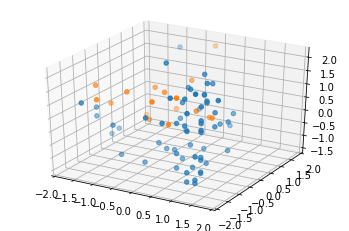

In [202]:
from matplotlib import pyplot as plt


absent = dataset[dataset['kyphosis'] == 0]
present = dataset[dataset['kyphosis'] == 1]

ax = plt.figure().gca(projection='3d')
ax.scatter(absent['start'], absent['number'], absent['age'])
ax.scatter(present['start'], present['number'], present['age'])
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.show()
plt.close()

이전에 봤던 방향에서 보면 위 처럼 보이지만 시각화를 할 때, 가끔 방향을 뒤집으면 안보이던 것들이 보일 때도 있습니다.

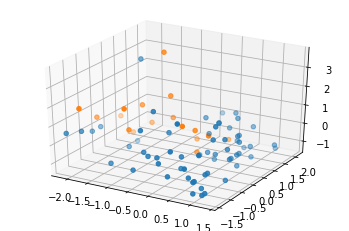

In [209]:
from matplotlib import pyplot as plt


absent = dataset[dataset['kyphosis'] == 0]
present = dataset[dataset['kyphosis'] == 1]

ax = plt.figure().gca(projection='3d')
ax.scatter(absent['start'], absent['age'], absent['number'])
ax.scatter(present['start'], present['age'], present['number'])
# age와 number의 순서를 바꿨습니다 !

plt.show()
plt.close()

가장 위에 동 떨어져 있는 두개의 아웃라이어가 보이시나요? 이러한 아웃라이어 때문에 로지스틱 회귀 같은 알고리즘들은 크게 영향을 받겠지만, K-NN은 저런 아웃라이어에 영향을 거의 받지 않아서, 아웃라이어에 있어서 상당히 강건한(Robust) 모델이라고 할 수 있습니다. 따라서 여러분의 데이터에 이렇게 튀는 아웃라이어 데이터가 많다면, K-NN 알고리즘의 사용을 고려해보세요.

<br>

### 5. K-NN의 단점 
![](https://github.com/gusdnd852/bigdata-lecture/blob/master/_notebooks/img/Day3/knn_slow.jpg?raw=True)

그러나 K-NN 알고리즘 역시 단점이 존재합니다. 한번 검색할 때, 모든 데이터와의 거리를 비교해야한다는 단점이 있습니다. 때문에, 만약 10,000개의 데이터가 있다면 모든 샘플들과의 거리 값 10,000개를 계산하고 그 중 가장 작은 K개의 거리를 찾아야합니다. 때문에 데이터가 100,000,000개로 늘어나면 100,000,000번 비교를 계산해야합니다. 이럴 경우 검색속도가 지나치게 느리게 됩니다. 다른 모델의 경우, 선이나 트리 등의 구조를 만들어놓고 그 구조만 저장합니다. 그래서 새로운 데이터가 들어오면 그 구조에 입력해서 비교를 수행하지만, K-NN은 모든 데이터의 특징과 전부 비교하고, 모든 거리값을 정렬해서 가장 낮은 $k$개만 찾아내기 때문에 정말 느립니다.
<br><br>

이러한 문제를 해결하기 위해 Kd-Tree, Ball-Tree 등의 알고리즘을 적용하여 속도를 향상 시킬 수 있으나, 이러한 내용까지 모두 설명하기는 조금 어려우므로 생략하겠습니다. 궁금하신 분들은 검색하셔서 공부하시거나 저에게 물어봐주세요.

<br>

### 6. KNN Regression

![](https://www.jeremyjordan.me/content/images/2017/06/Screen-Shot-2017-06-17-at-9.30.39-AM-1.png)

저는 이 수업에서 K-NN을 분류 알고리즘이라고 소개하였습니다. 그러나, K-NN은 회귀 알고리즘으로도 사용가능합니다. 오른쪽 그림을 보면 파란색 별이 주어졌을 때, 가장 가까운 3개의 데이터가 녹색이므로 분류작업이였다면, 녹색 클래스로 분류되었을 것입니다. 회귀작업은 이렇게 클래스가 나뉘어 있는 작업이 아닙니다. 만약 이 데이터가 회귀 데이터라면 클래스라는 개념이 없기 때문에 왼쪽처럼 모든 별의 색깔이 같을 것이며, 각 별은 라벨로써 하나의 숫자를 라벨로 가지고 있을 것입니다. 가령 이전에 해봤던 집의 가격 문제라던가, 동물의 생존률, 과일의 당도 등의 연속형 숫자 데이터가 라벨로 존재할 것입니다. <br><br>

K를 3으로 설정했다면 위 그림처럼 가장 가까운 3개의 데이터가 존재할 것이고 위 예시에서는 각각 50, 55, 51을 가진 별들이 존재하게 됩니다. KNN 회귀에서는 이들의 평균으로 입력된 데이터의 라벨을 예측합니다. 따라서 새로운 데이터의 라벨은 (50 + 55 + 51 = 156) / 3으로 52정도로 예측하게 됩니다. 즉, KNN 회귀에서는 새로운 데이터의 라벨을 가장 가까운 K개의 데이터의 라벨 평균으로 예측하게 됩니다. sklearn에서는 `from sklearn.neighbors import KNeighborsRegressor`를 import하여 손쉽게 사용할 수 있습니다. 매우 안타깝지만 시간 관계상 KNN 회귀는 이번 강의에서 직접 실습하진 않습니다. 만약 여러분이 회귀를 해야한다면 `KNeighborsRegressor`로도 성능을 꼭 측정해보시길 바랍니다.